# Setup Spark in Google Colab
*reference: https://www.analyticsvidhya.com/blog/2020/11/a-must-read-guide-on-how-to-work-with-pyspark-on-google-colab-for-data-scientists/*


*to install other versions, get the download link from https://spark.apache.org/downloads.html*

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
!tar -xvf spark-3.3.3-bin-hadoop3.tgz
!pip install findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"

--2023-12-15 17:14:24--  https://dlcdn.apache.org/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299426263 (286M) [application/x-gzip]
Saving to: ‘spark-3.3.3-bin-hadoop3.tgz’

spark-3.3.3-bin-had 100%[===================>] 285.55M   165MB/s    in 1.7s    

2023-12-15 17:14:38 (165 MB/s) - ‘spark-3.3.3-bin-hadoop3.tgz’ saved [299426263/299426263]

spark-3.3.3-bin-hadoop3/
spark-3.3.3-bin-hadoop3/LICENSE
spark-3.3.3-bin-hadoop3/NOTICE
spark-3.3.3-bin-hadoop3/R/
spark-3.3.3-bin-hadoop3/R/lib/
spark-3.3.3-bin-hadoop3/R/lib/SparkR/
spark-3.3.3-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.3-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.3-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.3-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.3-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.3

In [ ]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext(appName="myAppName")

In [ ]:

from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Extraction**

In [ ]:
import os.path
baseDir = os.path.join('.')
inputPath1 = os.path.join('/content/drive/My Drive/csvs/amazon_products.csv')
inputPath2 = os.path.join('/content/drive/My Drive/csvs/amazon_categories.csv')
fileName1 = os.path.join(baseDir, inputPath1)
fileName2 = os.path.join(baseDir, inputPath2)


amazonProductsRDD = sc.textFile(fileName1, 8)
amazonCategoriesRDD = sc.textFile(fileName2,8)

In [ ]:
numPoints = amazonProductsRDD.count()
print (numPoints)
samplePoints = amazonProductsRDD.take(5)
print (samplePoints)
numamazonCategories = amazonCategoriesRDD.count()
print (numamazonCategories)
sampleAmazonCategory = amazonCategoriesRDD.take(240)
print (sampleAmazonCategory)

1426338
['asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth', 'B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch",https://m.media-amazon.com/images/I/815dLQKYIYL._AC_UL320_.jpg,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.0,104,False,2000', 'B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue,https://m.media-amazon.com/images/I/81bQlm7vf6L._AC_UL320_.jpg,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000', 'B07XSCCZYG,"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch",https://m.media-amazon.com/images/I/71EA35zvJBL._AC_UL320_.jpg,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300', 'B08MVFKGJM,"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)",https://m.media-amazon.com/images/I/91k6NYLQyIL._AC_UL

# **Data Validation**
Here we will be looking at the asin, Item title, stars, reviews, price, List price, category, and the number bought in the past month. The goal is to predict the number bought in the past month based on the rating, reivews, and price range for the categories

In [ ]:
# Display the null
rows_with_null = amazonProductsRDD.filter(lambda row: any(field is None or field.strip() == '' for field in row.split(',')))

# Collect and print rows with null values
null_values = rows_with_null.collect()
null_count = rows_with_null.count()
print(null_values)
print(null_count)


['B082289412,"Helly Hansen Men\'s HH LIFA Lightweight Quick Dry Moisture Wicking Thermal Baselayer Pant Bottom,,",https://m.media-amazon.com/images/I/41g+3Xip4EL._AC_UL320_.jpg,https://www.amazon.com/dp/B082289412,4.3,0,40.0,0.0,110,False,0', 'B00IQ3JJHS,"Men\'s Tanicus 8"" Hot Duty Boot, ,",https://m.media-amazon.com/images/I/91JLNHRVsTL._AC_UL320_.jpg,https://www.amazon.com/dp/B00IQ3JJHS,4.4,0,189.95,0.0,114,False,0', 'B0758CSSF2,"Amazon Basics 14-Gauge Audio Speaker Wire Cable - 99.9% Oxygen-Free Copper, 100 Feet, , Black",https://m.media-amazon.com/images/I/81Bq4aoP9OL._AC_UL320_.jpg,https://www.amazon.com/dp/B0758CSSF2,4.7,6204,37.96,44.04,69,False,0', 'B09BSVTJJ9,"OnePlus Buds Pro True Wireless Earbuds White, Smart Active Noise Cancelling, Wireless Charging Case Included, , Dual Connection, 38 Hour Playtime, Fast Charging, Water Resistant, Glossy White",https://m.media-amazon.com/images/I/51pHE5XikGL._AC_UL320_.jpg,https://www.amazon.com/dp/B09BSVTJJ9,4.2,466,149.99,0.0,71,False,

In [ ]:
distinct_count = amazonProductsRDD.distinct().count()
total_count = amazonProductsRDD.count()
duplicate_count = total_count- distinct_count
print(duplicate_count)

0


In [ ]:
"""Cleaning the entries with null/empty values and duplicates"""
# Remove rows with potential null or empty values
cleanedNull = amazonProductsRDD.filter(lambda row: all(field is not None and field.strip() != '' for field in row.split(',')))

# Remove duplicates from cleaned RDD
#cleanedUnique = cleanedNull.distinct()

# Count the cleaned and unique rows
countCleanedUnique = cleanedNull.count()
print("Number of cleaned unique rows:", countCleanedUnique)

Number of cleaned unique rows: 1426196


In [ ]:
"""Extracting the desired data"""
amazonProductsRDD= cleanedNull
samplePoints = amazonProductsRDD.take(5)
print (samplePoints)

['asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth', 'B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch",https://m.media-amazon.com/images/I/815dLQKYIYL._AC_UL320_.jpg,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.0,104,False,2000', 'B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue,https://m.media-amazon.com/images/I/81bQlm7vf6L._AC_UL320_.jpg,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000', 'B07XSCCZYG,"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch",https://m.media-amazon.com/images/I/71EA35zvJBL._AC_UL320_.jpg,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300', 'B08MVFKGJM,"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)",https://m.media-amazon.com/images/I/91k6NYLQyIL._AC_UL320_.jpg

In [ ]:
def replace_commas(line):
    inside_quotes = False
    result = []
    field = ''
    for char in line:
        if char == '"':
            inside_quotes = not inside_quotes
        if char == ',' and not inside_quotes:
            result.append('|')
        else:
            result.append(char)
    return ''.join(result)

# Apply the function to the RDD
rdd_with_pipe_delimiter = amazonProductsRDD.map(replace_commas)
result = rdd_with_pipe_delimiter.take(5)
print(result)

['asin|title|imgUrl|productURL|stars|reviews|price|listPrice|category_id|isBestSeller|boughtInLastMonth', 'B014TMV5YE|"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch"|https://m.media-amazon.com/images/I/815dLQKYIYL._AC_UL320_.jpg|https://www.amazon.com/dp/B014TMV5YE|4.5|0|139.99|0.0|104|False|2000', 'B07GDLCQXV|Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue|https://m.media-amazon.com/images/I/81bQlm7vf6L._AC_UL320_.jpg|https://www.amazon.com/dp/B07GDLCQXV|4.5|0|169.99|209.99|104|False|1000', 'B07XSCCZYG|"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch"|https://m.media-amazon.com/images/I/71EA35zvJBL._AC_UL320_.jpg|https://www.amazon.com/dp/B07XSCCZYG|4.6|0|365.49|429.99|104|False|300', 'B08MVFKGJM|"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)"|https://m.media-amazon.com/images/I/91k6NYLQyIL._AC_UL320_.jpg

In [ ]:
# Assuming 'product_rdd' has 'category_id' column and 'categories_rdd' has 'id' column

# Mapping amazonProductsRDD by category_id
mappedProductRDD = rdd_with_pipe_delimiter.map(lambda line: (line.split('|')[8], line))

# Mapping categoriesRDD by id
mappedCategoriesRDD = amazonCategoriesRDD.map(lambda line: (line.split(',')[0], line))

# Performing the join
joinedRDD = mappedProductRDD.join(mappedCategoriesRDD)

# Accessing the joined data
result = mappedProductRDD.take(5)
print(result)
print(joinedRDD.take(5))

[('category_id', 'asin|title|imgUrl|productURL|stars|reviews|price|listPrice|category_id|isBestSeller|boughtInLastMonth'), ('104', 'B014TMV5YE|"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch"|https://m.media-amazon.com/images/I/815dLQKYIYL._AC_UL320_.jpg|https://www.amazon.com/dp/B014TMV5YE|4.5|0|139.99|0.0|104|False|2000'), ('104', 'B07GDLCQXV|Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue|https://m.media-amazon.com/images/I/81bQlm7vf6L._AC_UL320_.jpg|https://www.amazon.com/dp/B07GDLCQXV|4.5|0|169.99|209.99|104|False|1000'), ('104', 'B07XSCCZYG|"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch"|https://m.media-amazon.com/images/I/71EA35zvJBL._AC_UL320_.jpg|https://www.amazon.com/dp/B07XSCCZYG|4.6|0|365.49|429.99|104|False|300'), ('104', 'B08MVFKGJM|"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)"|https://m.

In [ ]:
print(joinedRDD.count())
print(mappedProductRDD.count())

1388159
1426196


In [ ]:
"""Filtering out the headers"""
import csv
def filterLines(amazonRDDRecord):
    """ Skips lines with metadata and label information
    Args:
        amazolRDDRecord : a line from the amazon csv files.

    Returns:
        True - if line is not metadata/label; False otherwise
    """
    reader = csv.reader([amazonRDDRecord])
    fieldsList = next(reader)
    if u'asin' in fieldsList[0] or u'id' in fieldsList[0]:
        return False
    else:
        return True

filteredAmazonProductsRDD = amazonProductsRDD.filter(filterLines)
filteredAmazonCategoriesRDD = amazonCategoriesRDD.filter(filterLines)
print(filteredAmazonProductsRDD.take(5))
print(filteredAmazonCategoriesRDD.take(5))

['B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch",https://m.media-amazon.com/images/I/815dLQKYIYL._AC_UL320_.jpg,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.0,104,False,2000', 'B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue,https://m.media-amazon.com/images/I/81bQlm7vf6L._AC_UL320_.jpg,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000', 'B07XSCCZYG,"Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch",https://m.media-amazon.com/images/I/71EA35zvJBL._AC_UL320_.jpg,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300', 'B08MVFKGJM,"Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)",https://m.media-amazon.com/images/I/91k6NYLQyIL._AC_UL320_.jpg,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400', 'B01DJLKZBA,"Winfield 2 Hardsid

In [ ]:
import csv

def extractFields(amazonRDDRecord):
    """Creates a key-value pair consisting of

    Args:
        amazonRDDRecord : a comma separated string consisting of all fields in the data set.

    Returns:
        extracted record: key-value pair as detailed above
    fieldsList = amazonRDDRecord.split(',')
    """
    reader = csv.reader([amazonRDDRecord])
    fieldsList = next(reader)
    if float(fieldsList[7])==0.0:
      fieldsList[7]=fieldsList[6]
    price_range_value = float(fieldsList[7])-float(fieldsList[6])
    rating_score = float(fieldsList[4])*float(fieldsList[5])
    """0= asin, 1=title, 2= img url, 3= producturl, 4=stars, 5= reviews, 6= price, 7= listing price, 8= category_id, 9= bestseller, 10= bought in last month"""
    return (fieldsList[0],(fieldsList[1],fieldsList[4],fieldsList[5],rating_score,fieldsList[6],fieldsList[7],fieldsList[8],price_range_value))

amazonProductsPairRDD = filteredAmazonProductsRDD.map(extractFields)
print(amazonProductsPairRDD.take(4))


[('B014TMV5YE', ('Sion Softside Expandable Roller Luggage, Black, Checked-Large 29-Inch', '4.5', '0', 0.0, '139.99', '139.99', '104', 0.0)), ('B07GDLCQXV', ('Luggage Sets Expandable PC+ABS Durable Suitcase Double Wheels TSA Lock Blue', '4.5', '0', 0.0, '169.99', '209.99', '104', 40.0)), ('B07XSCCZYG', ('Platinum Elite Softside Expandable Checked Luggage, 8 Wheel Spinner Suitcase, TSA Lock, Men and Women, True Navy Blue, Checked Medium 25-Inch', '4.6', '0', 0.0, '365.49', '429.99', '104', 64.5)), ('B08MVFKGJM', ('Freeform Hardside Expandable with Double Spinner Wheels, Navy, 2-Piece Set (21/28)', '4.6', '0', 0.0, '291.59', '354.37', '104', 62.78000000000003))]


In [ ]:
import csv

def extractCategoryFields(amazonCategoriesRDDRecord):
    """Creates a key-value pair for categories dataset.

    Args:
        amazonCategoriesRDDRecord : a comma-separated string consisting of fields in the categories dataset.

    Returns:
        extracted record: key-value pair containing category_id and category_name
    """
    reader = csv.reader([amazonCategoriesRDDRecord])
    fieldsList = next(reader)
    return (fieldsList[0], fieldsList[1])

amazonProductsPairRDD = filteredAmazonProductsRDD.map(extractFields)

categoriesPairRDD = amazonCategoriesRDD.map(extractCategoryFields)

joinedRDD = amazonProductsPairRDD.map(lambda x: (x[1][6], x))  # Map category_id as key for amazonProductsPairRDD
joinedRDD = joinedRDD.join(categoriesPairRDD)

# Now 'joinedRDD' contains the product details along with the category_name matched to the category_id
#print(joinedRDD.take(4))

In [ ]:
finalRDD = joinedRDD.map(lambda x: (x[1][0][0], (x[1][0][1][0], x[1][0][1][1], x[1][0][1][2], x[1][0][1][3], x[1][0][1][4], x[1][0][1][5], x[1][0][1][6], x[1][0][1][7], x[1][1])))

print(finalRDD.take(4))

[('B087LP6F4Y', ('Logitech G PRO X SUPERLIGHT Wireless Gaming Mouse, Ultra-Lightweight, HERO 25K Sensor, 25,600 DPI, 5 Programmable Buttons, Long Battery Life, Compatible with PC / Mac - White', '4.7', '0', 0.0, '141.0', '159.99', '248', 18.99000000000001, 'Mac Games & Accessories')), ('B0CCVYHZ9N', ('CORSAIR SCIMITAR ELITE RGB WIRELESS MMO Gaming Mouse - 26,000 DPI - 16 Programmable Buttons - Up to 150hrs Battery - iCUE Compatible - Black', '4.4', '0', 0.0, '129.99', '129.99', '248', 0.0, 'Mac Games & Accessories')), ('B0BSHHQ69Q', ('Turtle Beach Stealth 600 Gen 2 MAX Wireless Multiplatform Amplified Gaming Headset for Xbox Series X|S, Xbox One, PS5, PS4, Nintendo Switch, PC, and Mac with 48+ Hour Battery – Pink', '4.3', '0', 0.0, '99.95', '119.99', '248', 20.039999999999992, 'Mac Games & Accessories')), ('B0885FJ8CB', ('Razer Gigantus v2 Cloth Gaming Mouse Pad (XXL): Thick, High-Density Foam - Non-Slip Base - Classic Black', '4.7', '0', 0.0, '26.98', '29.99', '248', 3.009999999999998

In [ ]:
print(finalRDD.count())

1426195


# **Exploratory Data Analysis**
Try to visualize the data

In [ ]:
#finding the top 20 products with highest rating
top_20_highest_rated = finalRDD.takeOrdered(20, key=lambda x: -float(x[1][1]))
print(top_20_highest_rated)

[('B0BQ2VX1QP', ('Keychron K1 Pro RGB Ultra-Slim QMK/VIA Custom Bluetooth Wireless/USB Wired Mechanical Keyboard with Low-Profile Gateron Brown Switch, PBT Keycaps TKL Layout Computer Keyboard for Mac Windows Linux', '5.0', '0', 0.0, '109.99', '109.99', '248', 0.0, 'Mac Games & Accessories')), ('B0BN2XQSD5', ('Keychron K4 Pro QMK/VIA Custom Mechanical Keyboard, Programmable Macro Wireless Bluetooth 5.1/Wired USB Keyboard with Hot-Swappable RGB Backlit Compatible Mac Windows Linux - Barebone Version', '5.0', '0', 0.0, '94.99', '94.99', '248', 0.0, 'Mac Games & Accessories')), ('B0BXL2K7J7', ('Keychron Q2 Pro QMK/VIA Wireless Custom Mechanical Keyboard, Full Metal Programmable Knob Hot-Swappable K Pro Banana Switches, KSA Double-Shot PBT Keycaps RGB Backlight for Mac Windows Linux - Grey', '5.0', '0', 0.0, '219.99', '219.99', '248', 0.0, 'Mac Games & Accessories')), ('B09MLNNV98', ('ZIYOU LANG Mechanical Gaming Keyboard,87 Keys Chroma RGB LED Backlit,Black Computer Keyboard,PU Wrist Rest

In [ ]:
for product in top_20_highest_rated:
    print("Product ID:", product[0])
    print("Number of Reviews:", product[1][2])
    print("Product Details:", product[1][0])
    print("Product Category:", product[1][8])
    print("Product Price:", product[1][4])
    print("\n")

Product ID: B0BQ2VX1QP
Number of Reviews: 0
Product Details: Keychron K1 Pro RGB Ultra-Slim QMK/VIA Custom Bluetooth Wireless/USB Wired Mechanical Keyboard with Low-Profile Gateron Brown Switch, PBT Keycaps TKL Layout Computer Keyboard for Mac Windows Linux
Product Category: Mac Games & Accessories
Product Price: 109.99


Product ID: B0BN2XQSD5
Number of Reviews: 0
Product Details: Keychron K4 Pro QMK/VIA Custom Mechanical Keyboard, Programmable Macro Wireless Bluetooth 5.1/Wired USB Keyboard with Hot-Swappable RGB Backlit Compatible Mac Windows Linux - Barebone Version
Product Category: Mac Games & Accessories
Product Price: 94.99


Product ID: B0BXL2K7J7
Number of Reviews: 0
Product Details: Keychron Q2 Pro QMK/VIA Wireless Custom Mechanical Keyboard, Full Metal Programmable Knob Hot-Swappable K Pro Banana Switches, KSA Double-Shot PBT Keycaps RGB Backlight for Mac Windows Linux - Grey
Product Category: Mac Games & Accessories
Product Price: 219.99


Product ID: B09MLNNV98
Number of 

In [ ]:
#finding the top 20 products with highest number of reviews
top_20_highest_reviewed = finalRDD.takeOrdered(20, key=lambda x: -float(x[1][2]))
print(top_20_highest_reviewed)

[('B00T0C9XRK', ('essence | Lash Princess False Lash Effect Mascara | Gluten & Cruelty Free', '4.3', '346563', 1490220.9, '4.99', '4.99', '48', 0.0, 'Makeup')), ('B09MV3KMPT', ('ThisWorx Cordless Car Vacuum - Portable, Mini Handheld Vacuum w/Rechargeable Battery and 3 Attachments - High-Powered Vacuum Cleaner w/ 60w Motor', '4.0', '292474', 1169896.0, '49.99', '49.99', '175', 0.0, 'Vacuum Cleaners & Floor Care')), ('B07PH22TG9', ('Queen Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets for Women, Men Kids & Teens - Deep Pockets - 4 Piece Set - Soft & Wrinkle Free - Spa Blue Bed Sheets - Queen Sheets - 4PC', '4.5', '281661', 1267474.5, '32.99', '39.99', '172', 7.0, "Kids' Home Store")), ('B09JVTQKDN', ('Queen Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets for Women, Men Kids & Teens - Deep Pockets - 4 Piece Set - Soft & Wrinkle Free - Off White Bed Sheets - Comfy Queen Sheets', '4.5', '281661', 1267474.5, '32.99', '39.99', '172', 7.0, "Kids' 

In [ ]:
for product in top_20_highest_reviewed:
    print("Product ID:", product[0])
    print("Number of Reviews:", product[1][2])
    print("Product Details:", product[1][0])
    print("Product Category:", product[1][8])
    print("Product Price:", product[1][4])
    print("\n")

Product ID: B00T0C9XRK
Number of Reviews: 346563
Product Details: essence | Lash Princess False Lash Effect Mascara | Gluten & Cruelty Free
Product Category: Makeup
Product Price: 4.99


Product ID: B09MV3KMPT
Number of Reviews: 292474
Product Details: ThisWorx Cordless Car Vacuum - Portable, Mini Handheld Vacuum w/Rechargeable Battery and 3 Attachments - High-Powered Vacuum Cleaner w/ 60w Motor
Product Category: Vacuum Cleaners & Floor Care
Product Price: 49.99


Product ID: B07PH22TG9
Number of Reviews: 281661
Product Details: Queen Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets for Women, Men Kids & Teens - Deep Pockets - 4 Piece Set - Soft & Wrinkle Free - Spa Blue Bed Sheets - Queen Sheets - 4PC
Product Category: Kids' Home Store
Product Price: 32.99


Product ID: B09JVTQKDN
Number of Reviews: 281661
Product Details: Queen Size Sheet Set - Breathable & Cooling Sheets - Hotel Luxury Bed Sheets for Women, Men Kids & Teens - Deep Pockets - 4 Piece Set - Soft &

In [ ]:
from tabulate import tabulate

highest_reviewed_table = []

for product in top_20_highest_reviewed:
    row = [
        product[0],  # Product ID
        product[1][2],  # Number of Reviews
        product[1][0],  # Product Details
        product[1][8],  # Product Category
        product[1][4]   # Product Price
    ]
    highest_reviewed_table.append(row)

headers = ["Product ID", "Number of Reviews", "Product Details", "Product Category", "Product Price"]

print(tabulate(highest_reviewed_table, headers=headers, tablefmt="grid"))

+--------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------+-----------------+
| Product ID   |   Number of Reviews | Product Details                                                                                                                                                                                          | Product Category                            |   Product Price |
+==============+=====================+==========================================================================================================================================================================================================+=============================================+=================+
| B00T0C9XRK   |              346563 | essence | Lash Princess False Lash Effect M

In [ ]:
category_counts = finalRDD.map(lambda x: (x[1][8],1)).reduceByKey(lambda a, b: a + b)
category_counts = category_counts.sortBy(lambda x: x[1], ascending=False)
print(category_counts.collect())

[("Girls' Clothing", 28617), ("Boys' Clothing", 24660), ('Toys & Games', 20839), ("Men's Shoes", 19821), ("Women's Handbags", 18994), ("Girls' Jewelry", 18514), ("Men's Clothing", 18257), ("Men's Accessories", 17679), ("Women's Clothing", 17393), ("Women's Jewelry", 17004), ('Travel Accessories', 16159), ("Women's Shoes", 15626), ('Home Storage & Organization', 15434), ("Women's Accessories", 13921), ("Men's Watches", 12839), ("Girls' Shoes", 10938), ("Boys' Jewelry", 10867), ('Backpacks', 9580), ('Foot, Hand & Nail Care Products', 9534), ('Sports & Outdoor Play Toys', 9485), ('Office Electronics', 9480), ('Automotive Performance Parts & Accessories', 9418), ('Automotive Tires & Wheels', 9395), ('Industrial Hardware', 9362), ('Painting, Drawing & Art Supplies', 9340), ('Light Bulbs', 9253), ('Headphones & Earbuds', 9241), ('Lights, Bulbs & Indicators', 9238), ('Industrial Adhesives, Sealants & Lubricants', 9084), ('Baby & Toddler Toys', 9020), ('Cat Supplies', 8950), ('Portable Audio &

In [ ]:
category_count_table = []

for category in category_counts.collect():
    row = [
        category[0],  # Category Name
        category[1]  # Number of Products
    ]
    category_count_table.append(row)

headers = ["Category", "Number of Products"]

print(tabulate(category_count_table, headers=headers, tablefmt="grid"))

+--------------------------------------------------+----------------------+
| Category                                         |   Number of Products |
+==================================================+======================+
| Girls' Clothing                                  |                28617 |
+--------------------------------------------------+----------------------+
| Boys' Clothing                                   |                24660 |
+--------------------------------------------------+----------------------+
| Toys & Games                                     |                20839 |
+--------------------------------------------------+----------------------+
| Men's Shoes                                      |                19821 |
+--------------------------------------------------+----------------------+
| Women's Handbags                                 |                18994 |
+--------------------------------------------------+----------------------+
| Girls' Jew

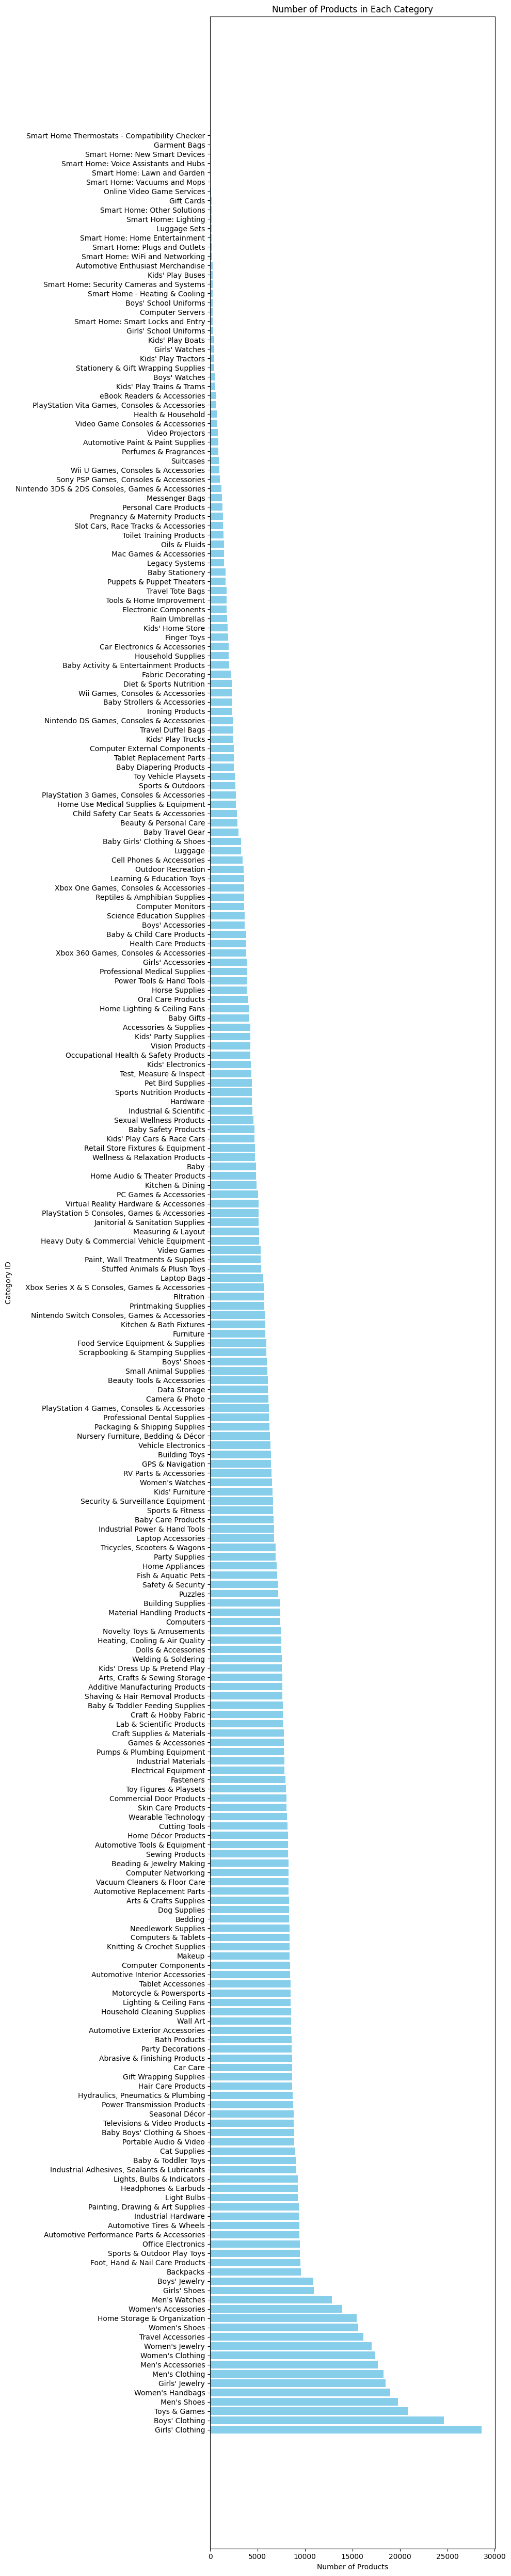

In [ ]:
import matplotlib.pyplot as plt

category_counts_collected = category_counts.collect()

category_ids = [category[0] for category in category_counts_collected]
product_counts = [count[1] for count in category_counts_collected]

plt.figure(figsize=(10, 50))
plt.barh(category_ids, product_counts, color='skyblue')
plt.ylabel('Category ID')
plt.xlabel('Number of Products')
plt.title('Number of Products in Each Category')
plt.tight_layout()
plt.show()

Category Ratings

In [ ]:
category_ratings = finalRDD.map(lambda x: (x[1][8], (float(x[1][1]), 1))).reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).mapValues(lambda x: x[0] / x[1])
category_sorted_ratings= category_ratings.sortBy(lambda x: x[1], ascending=False)
category_ratings = category_sorted_ratings.collect()


In [ ]:
category_rating_table = []

for category in category_ratings:
    row = [
        category[0],  # Category Name
        category[1]  # Number of Products
    ]
    category_rating_table.append(row)

headers = ["Category", "Number of Products"]

print(tabulate(category_rating_table, headers=headers, tablefmt="grid"))

+--------------------------------------------------+----------------------+
| Category                                         |   Number of Products |
+==================================================+======================+
| Gift Cards                                       |             4.83237  |
+--------------------------------------------------+----------------------+
| Health & Household                               |             4.56754  |
+--------------------------------------------------+----------------------+
| Industrial & Scientific                          |             4.55473  |
+--------------------------------------------------+----------------------+
| Household Supplies                               |             4.54531  |
+--------------------------------------------------+----------------------+
| Kitchen & Dining                                 |             4.54467  |
+--------------------------------------------------+----------------------+
| Food Servi

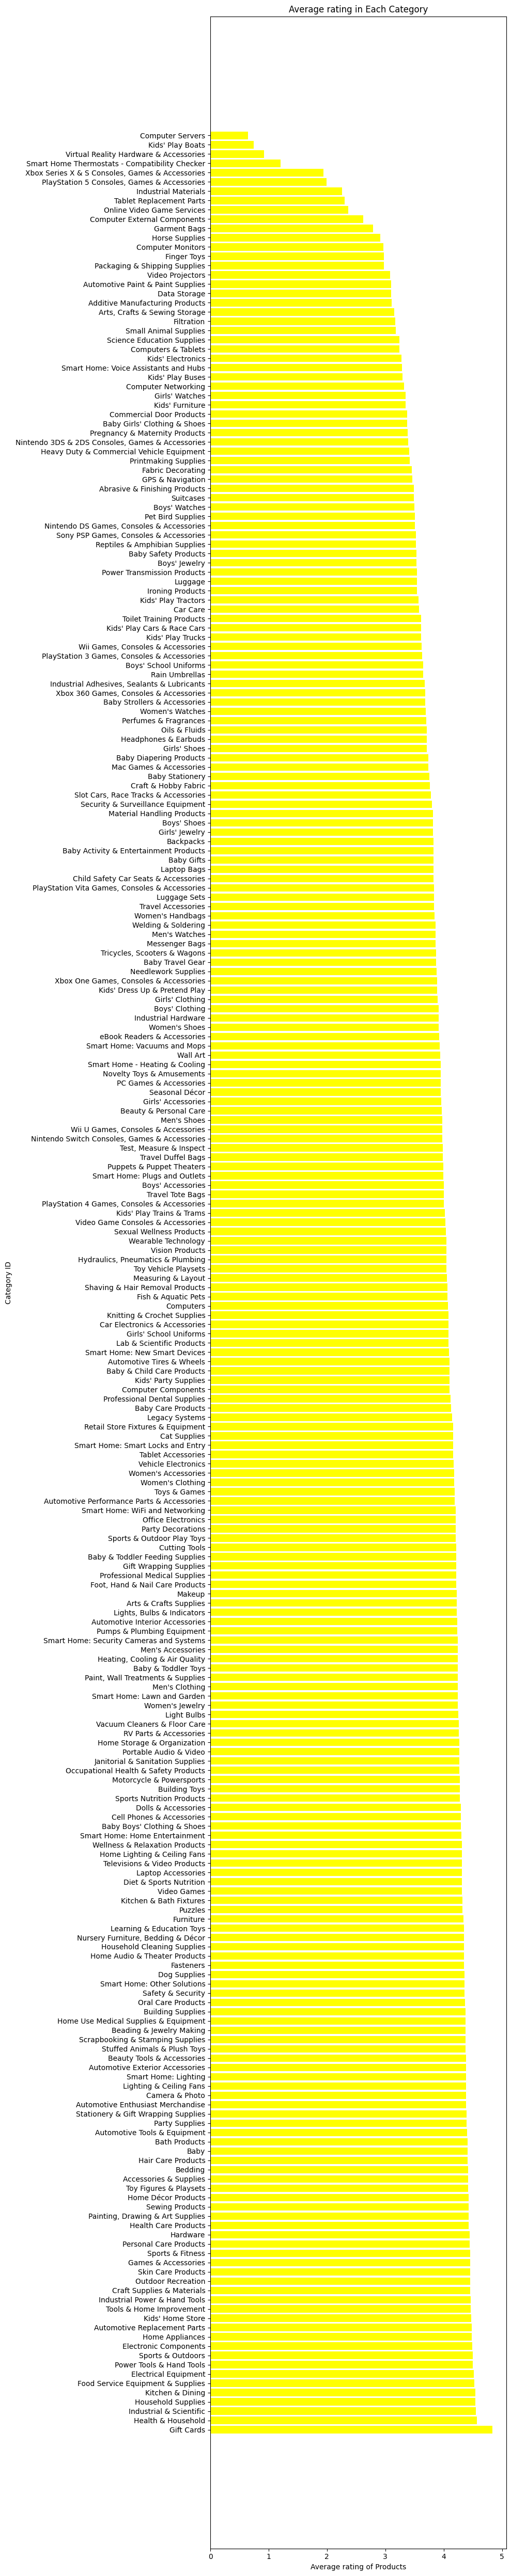

In [ ]:
import matplotlib.pyplot as plt


category_ids = [category[0] for category in category_ratings]
product_counts = [count[1] for count in category_ratings]

plt.figure(figsize=(10, 50))
plt.barh(category_ids, product_counts, color='yellow')
plt.ylabel('Category ID')
plt.xlabel('Average rating of Products')
plt.title('Average rating in Each Category')
plt.tight_layout()
plt.show()

Calculate the average listed price in each category

In [ ]:
category_prices = finalRDD.map(lambda x: (x[1][8], (float(x[1][5]), 1))).reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).mapValues(lambda x: x[0] / x[1])
category_prices = category_prices.sortBy(lambda x: x[1], ascending=False).collect()


category_prices_table = []

for category in category_prices:
    row = [
        category[0],  # Category Name
        category[1]  # Average Price
    ]
    category_prices_table.append(row)

headers = ["Category", "Average Price ($)"]

print(tabulate(category_prices_table, headers=headers, tablefmt="grid"))

+--------------------------------------------------+---------------------+
| Category                                         |   Average Price ($) |
+==================================================+=====================+
| Computer Servers                                 |          1536.47    |
+--------------------------------------------------+---------------------+
| Computers & Tablets                              |           561.63    |
+--------------------------------------------------+---------------------+
| Smart Home: Home Entertainment                   |           385.034   |
+--------------------------------------------------+---------------------+
| Smart Home - Heating & Cooling                   |           253.959   |
+--------------------------------------------------+---------------------+
| Luggage Sets                                     |           251.579   |
+--------------------------------------------------+---------------------+
| Smart Home: Vacuums and

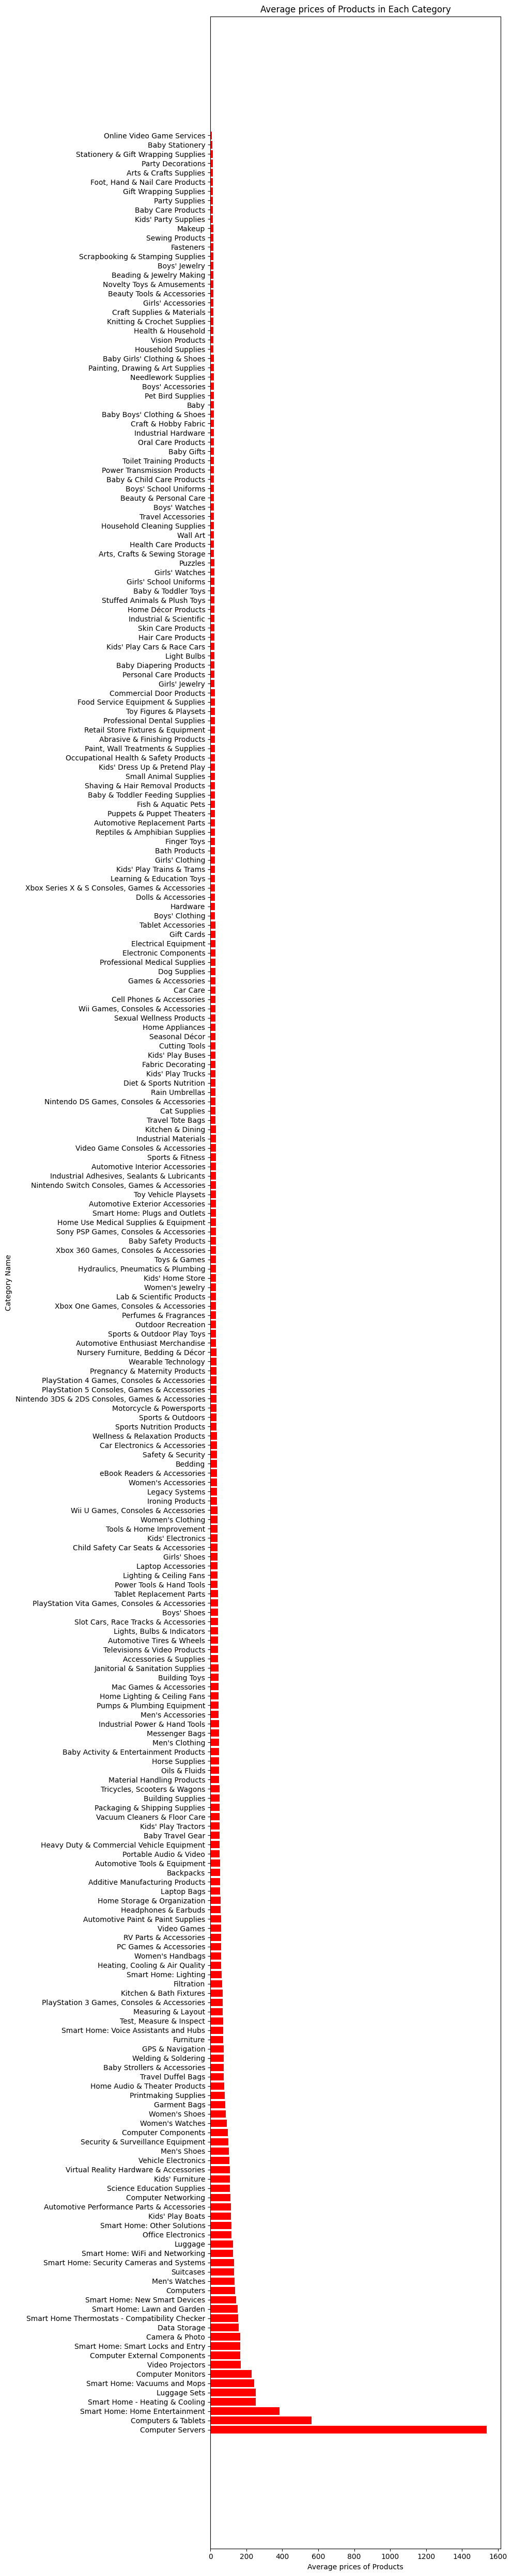

In [ ]:
category_ids = [category[0] for category in category_prices]
product_counts = [count[1] for count in category_prices]

plt.figure(figsize=(10, 50))
plt.barh(category_ids, product_counts, color='red')
plt.ylabel('Category Name')
plt.xlabel('Average prices of Products')
plt.title('Average prices of Products in Each Category')
plt.tight_layout()
plt.show()

In [ ]:
category_reviews = finalRDD.map(lambda x: (x[1][8], (float(x[1][2]), 1))).reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])).mapValues(lambda x: x[0] / x[1])
category_reviews_data = category_reviews.sortBy(lambda x: x[1], ascending=False)
category_reviews = category_reviews_data.collect()


category_reviews_table = []

for category in category_reviews:
    row = [
        category[0],  # Category Name
        category[1]  # Average Reviews
    ]
    category_reviews_table.append(row)

headers = ["Category", "Average Reviews"]

print(tabulate(category_reviews_table, headers=headers, tablefmt="grid"))

+--------------------------------------------------+---------------------+
| Category                                         |   Average Price ($) |
+==================================================+=====================+
| Smart Home: Security Cameras and Systems         |        7956.11      |
+--------------------------------------------------+---------------------+
| Smart Home: Voice Assistants and Hubs            |        2331.44      |
+--------------------------------------------------+---------------------+
| Diet & Sports Nutrition                          |        2285.85      |
+--------------------------------------------------+---------------------+
| Video Games                                      |        2276.47      |
+--------------------------------------------------+---------------------+
| Home Décor Products                              |        2121.44      |
+--------------------------------------------------+---------------------+
| Kids' Home Store       

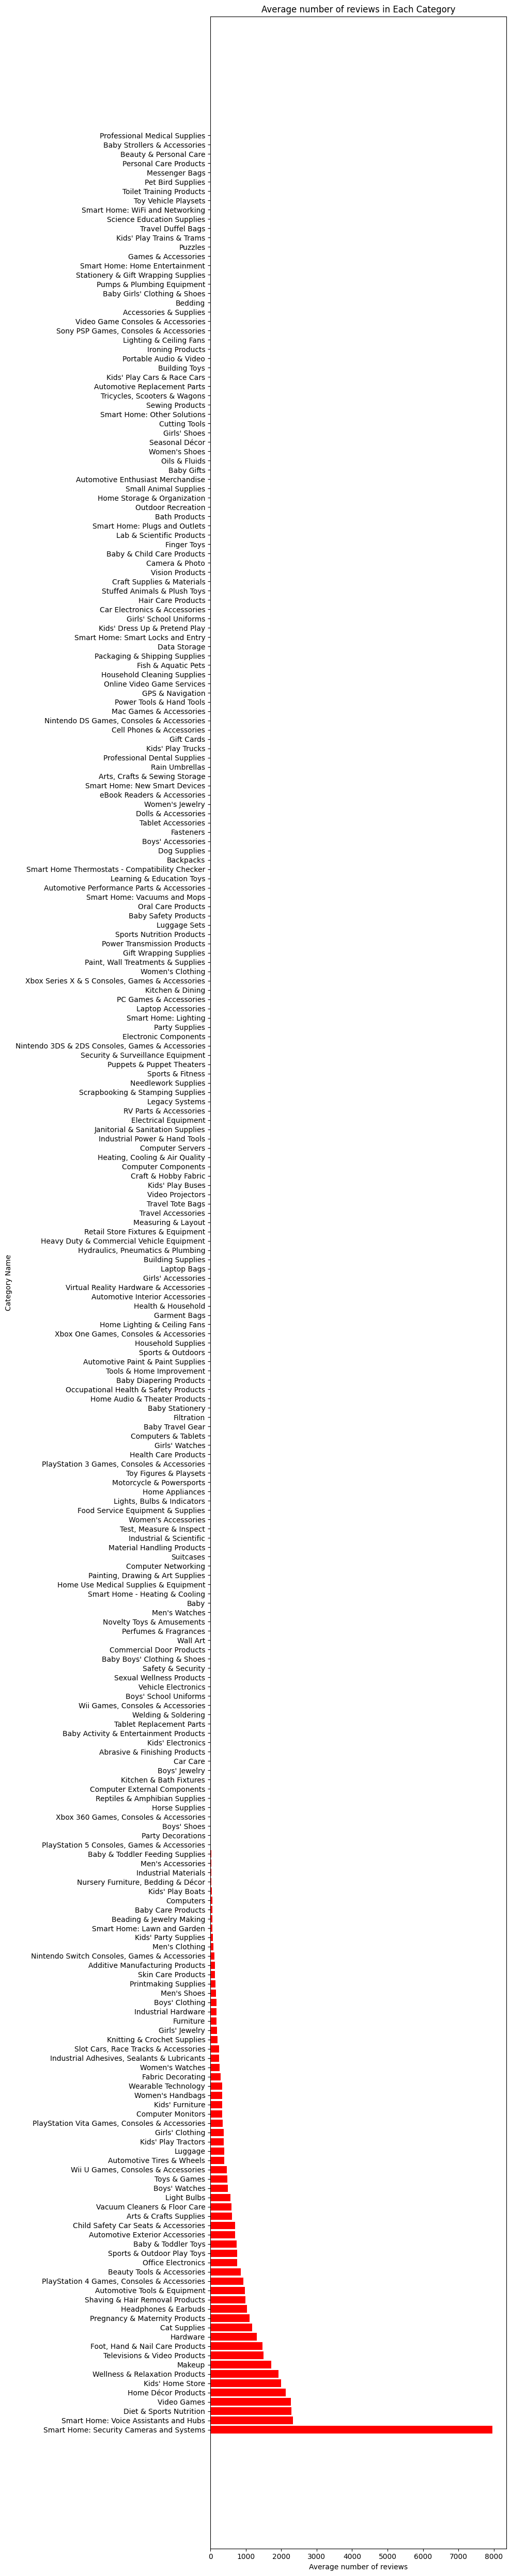

In [ ]:
category_ids = [category[0] for category in category_reviews]
reviews_counts = [count[1] for count in category_reviews]

plt.figure(figsize=(10, 50))
plt.barh(category_ids, reviews_counts, color='red')
plt.ylabel('Category Name')
plt.xlabel('Average number of reviews')
plt.title('Average number of reviews in Each Category')
plt.tight_layout()
plt.show()

In [ ]:
top20Categories= category_sorted_ratings.take(20)
print(top20Categories)
#extract category Names of top 20 categories
top20CategoryIds = [category[0] for category in top20Categories]
print(top20CategoryIds)
# filter products belonging to top 20 categories
productsCategories = finalRDD.filter(lambda x: x[1][8] in top20CategoryIds)
categoryProductRating = productsCategories.map(lambda x: (x[1][8], (x[0], x[1])))
def find_max_rating(a,b):
  return a if a[1] > b[1] else b

maxRatingByCategory = categoryProductRating.reduceByKey(find_max_rating)

highestRated = maxRatingByCategory.map(lambda x: (x[0], x[1][0],x[1][1][0],x[1][1][1],x[1][1][5]))
#find highest-rated product in each of the categoreis
#highestRated= productsCategories.map(lambda x: ((x[1][8], x[1][1]), x)).reduceByKey(lambda a, b: a if float(a[1][1]) > float(b[1][1]) else b).groupByKey().flatMap(lambda x: [max(x[1], key=lambda y: float(y[1]))])
print(highestRated.collect())


[('Gift Cards', 4.8323741007194165), ('Health & Household', 4.567541436464074), ('Industrial & Scientific', 4.554725919242075), ('Household Supplies', 4.545314109165826), ('Kitchen & Dining', 4.544674313805854), ('Food Service Equipment & Supplies', 4.522901536902549), ('Electrical Equipment', 4.518065995668207), ('Power Tools & Hand Tools', 4.502180685358294), ('Sports & Outdoors', 4.499773926149235), ('Electronic Components', 4.487542662116039), ('Home Appliances', 4.484011420413983), ('Automotive Replacement Parts', 4.483158402702329), ("Kids' Home Store", 4.475347593582901), ('Tools & Home Improvement', 4.462652705061099), ('Industrial Power & Hand Tools', 4.459039003410926), ('Craft Supplies & Materials', 4.45746431786031), ('Outdoor Recreation', 4.456028169014103), ('Skin Care Products', 4.45394052044605), ('Games & Accessories', 4.453780973167246), ('Sports & Fitness', 4.452034229094729)]
['Gift Cards', 'Health & Household', 'Industrial & Scientific', 'Household Supplies', 'Kitc

In [ ]:
data = highestRated.collect()

headers = ["Category", "Product ID", "Product Name", "Rating", "Price"]

print(tabulate(data, headers=headers, tablefmt="grid"))

+-----------------------------------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+---------+
| Category                          | Product ID   | Product Name                                                                                                                                                                                                |   Rating |   Price |
+===================================+==============+=============================================================================================================================================================================================================+==========+=========+
| Industrial & Scientific           | B0C8MJTSG5   | 𝟐 𝐏𝐚𝐜𝐤 Kids Noise Reduction Ear Muffs Hearing Protection, Noise Cancelling Headphones for Kids, Soft Wide H

In [151]:
def calculate_rating(amazonRDD):
    rating = float(amazonRDD[1][3])
    price = float(amazonRDD[1][5])
    if price != 0:
      multiplied_value = rating / price
    else:
      multiplied_value = rating
    return (amazonRDD[0],( amazonRDD[1] + (multiplied_value,)))
modelRDD = finalRDD.map(calculate_rating)

print(modelRDD.take(3))

[('B087LP6F4Y', ('Logitech G PRO X SUPERLIGHT Wireless Gaming Mouse, Ultra-Lightweight, HERO 25K Sensor, 25,600 DPI, 5 Programmable Buttons, Long Battery Life, Compatible with PC / Mac - White', '4.7', '0', 0.0, '141.0', '159.99', '248', 18.99000000000001, 'Mac Games & Accessories', 0.0)), ('B0CCVYHZ9N', ('CORSAIR SCIMITAR ELITE RGB WIRELESS MMO Gaming Mouse - 26,000 DPI - 16 Programmable Buttons - Up to 150hrs Battery - iCUE Compatible - Black', '4.4', '0', 0.0, '129.99', '129.99', '248', 0.0, 'Mac Games & Accessories', 0.0)), ('B0BSHHQ69Q', ('Turtle Beach Stealth 600 Gen 2 MAX Wireless Multiplatform Amplified Gaming Headset for Xbox Series X|S, Xbox One, PS5, PS4, Nintendo Switch, PC, and Mac with 48+ Hour Battery – Pink', '4.3', '0', 0.0, '99.95', '119.99', '248', 20.039999999999992, 'Mac Games & Accessories', 0.0))]


In [152]:
top_5_products = modelRDD.sortBy(lambda x: x[1][-1], ascending=False).take(5)

for product in top_5_products:
    print(product)

('B07WVFCVJN', ('Roku Express | HD Roku Streaming Device with Simple Remote (no TV controls), Free & Live TV', '4.7', '177760', 835472.0, '0.0', '0.0', '69', 0.0, 'Televisions & Video Products', 835472.0))
('B003A7LVX0', ('Fresh Step Odor Shield Scented Litter with the Power of Febreze, Clumping Cat Litter, 25 Pounds', '4.6', '131149', 603285.3999999999, '0.0', '0.0', '179', 0.0, 'Cat Supplies', 603285.3999999999))
('B07HVTPKZV', ('Chuck Taylor Sneakers', '4.6', '99792', 459043.19999999995, '0.0', '0.0', '114', 0.0, "Men's Shoes", 459043.19999999995))
('B083KVM9VW', ('Samsung Galaxy Buds Plus, True Wireless Earbuds Bluetooth 5.0 (Wireless Charging Case Included), Black – US Version', '4.6', '83829', 385613.39999999997, '0.0', '0.0', '71', 0.0, 'Headphones & Earbuds', 385613.39999999997))
('B08DF26MXW', ('Xbox Core Wireless Controller – Robot White – Xbox Series X|S, Xbox One, and Windows Devices', '4.7', '71100', 334170.0, '0.0', '0.0', '255', 0.0, 'Video Games', 334170.0))


# **Modelling**

In [124]:
#creating the regression dataset for price, rating
def filterZeroRatings(RDD):
  if float(RDD[1][2])==0:
    return False
  else:
    return True

def extractRegressionData(combinedPriceRatingReviewRecord):
    """Outputs a string record with the format "commute time,number of accidents, snow on ground"
    Args:
        combinedPriceRatingReviewRecord: key-value record where key is asin and value is a tuple containing comma-separated string values from finalRDD

    Returns:
        record with the format reviews, price, rating
    """

    rating = combinedPriceRatingReviewRecord[1][1]
    price = combinedPriceRatingReviewRecord[1][5]

    returnRecord = combinedPriceRatingReviewRecord[1][2]+","+price+","+rating
    return returnRecord

filteredFinalRDD= finalRDD.filter(filterZeroRatings)
regressionDataRDD = filteredFinalRDD.map(extractRegressionData)
print(regressionDataRDD.count())
print(regressionDataRDD.take(5))

295799
['110,13.89,4.5', '38,13.89,4.7', '7,428.99,4.7', '411,13.99,4.6', '141,12.89,4.6']


In [125]:
from pyspark.mllib.regression import LabeledPoint
import numpy as np

In [126]:
def parsePoint(line):
    """Converts a comma separated unicode string into a `LabeledPoint`.

    Args:
        line (unicode): Comma separated unicode string where the first element is the label and the
            remaining elements are features.

    Returns:
        LabeledPoint: The line is converted into a `LabeledPoint`, which consists of a label and
            features.
    """
    label_features = line.split(',')
    ret_val = LabeledPoint(label_features[0],label_features[1:])
    return ret_val

parsedSamplePoints = regressionDataRDD.map(parsePoint)
firstPoint = parsedSamplePoints.take(1)
firstPointFeatures =firstPoint[0].features
firstPointLabel = firstPoint[0].label
print (firstPointFeatures, firstPointLabel)
d = len(firstPointFeatures)
print(d)

[13.89,4.5] 110.0
2


In [127]:
def normalizeFeatures(lp):
    """Normalizes features in the LabeledPoint object lp.

    Args:
        lp - LabeledPoint object

    Returns:
        LabeledPoint: The object contains the label and the normalized features
    """
    normalizedFeatures = list()
    for i in range(0,len(lp.features)):
        feature = (lp.features[i]-broadcastMean.value[i])/broadcastStdev.value[i]
        normalizedFeatures.insert(i,feature)
    return LabeledPoint(lp.label, normalizedFeatures)
    #normalizedAccidents = (lp.features[0]-broadcastMeanAccidents.value)/broadcastStdevAccidents.value
    #normalizedSnoOnGround = (lp.features[1]-broadcastMeanSnoOnGround.value)/broadcastStdevSnoOnGround.value
    #return LabeledPoint(lp.label,[normalizedAccidents,normalizedSnoOnGround])

def getNormalizedRDD(nonNormalizedRDD):
    """Normalizes the features of the LabeldPoints contained in nonNormalizedRDD.

    Args:
        nonNormalizedRDD - RDD containing non-normalized features

    Returns:
        returnRDD: RDD containing normalized features
    """


    meanList = list()
    stdevList = list()
    numFeatures = len(nonNormalizedRDD.take(1)[0].features)
    for i in range(0,numFeatures):
        featureRDD = nonNormalizedRDD.map(lambda lp: lp.features[i])
        featureMean = featureRDD.mean()
        featureStdev = featureRDD.stdev()
        meanList.insert(i,featureMean)
        stdevList.insert(i,featureStdev)
    global broadcastMean
    broadcastMean = sc.broadcast(meanList)
    global broadcastStdev
    broadcastStdev = sc.broadcast(stdevList)
    returnRDD = nonNormalizedRDD.map(normalizeFeatures)
    return returnRDD

normalizedSamplePoints = getNormalizedRDD(parsedSamplePoints)
print(normalizedSamplePoints.take(5))

[LabeledPoint(110.0, [-0.29444872524756144,0.22474277929876024]), LabeledPoint(38.0, [-0.29444872524756144,0.657628476297471]), LabeledPoint(7.0, [4.22705427693705,0.657628476297471]), LabeledPoint(411.0, [-0.29335946892325776,0.44118562779811465]), LabeledPoint(141.0, [-0.30534128849059833,0.44118562779811465])]


In [128]:
weights = [.8, .2] # train/test split
seed = 42
parsedTrainData, parsedValData = normalizedSamplePoints.randomSplit(weights,seed)
parsedTrainData.cache()
parsedValData.cache()
nTrain = parsedTrainData.count()
nVal = parsedValData.count()

print(nTrain, nVal, nTrain + nVal)
print(normalizedSamplePoints.count())

236638 59161 295799
295799


In [130]:
#average review
averageNumReview = (parsedTrainData.map(lambda s: s.label)).mean()
print(averageNumReview)

869.6838546640863


In [132]:

import math
def squaredError(label, prediction):
    """Calculates the the squared error for a single prediction.

    Args:
        label (float): The correct value for this observation.
        prediction (float): The predicted value for this observation.

    Returns:
        float: The difference between the `label` and `prediction` squared.
    """
    sqrError = (label-prediction)*(label-prediction)
    return sqrError

def calcRMSE(labelsAndPreds):
    """Calculates the root mean squared error for an `RDD` of (label, prediction) tuples.

    Args:
        labelsAndPred (RDD of (float, float)): An `RDD` consisting of (label, prediction) tuples.

    Returns:
        float: The square root of the mean of the squared errors.
    """
    sqrSum = labelsAndPreds.map(lambda s: squaredError(s[0],s[1])).sum()
    return math.sqrt(sqrSum/labelsAndPreds.count())

labelsAndPredsTrain = parsedTrainData.map(lambda s: (s.label,averageNumReview))
rmseTrainBase = calcRMSE(labelsAndPredsTrain)

labelsAndPredsVal = parsedValData.map(lambda s: (s.label,averageNumReview))
rmseValBase = calcRMSE(labelsAndPredsVal)

print('Baseline Train RMSE = {0:.3f}'.format(rmseTrainBase))
print('Baseline Validation RMSE = {0:.3f}'.format(rmseValBase))

Baseline Train RMSE = 3708.900
Baseline Validation RMSE = 4095.281


In [133]:
from pyspark.mllib.linalg import DenseVector
from pyspark.mllib.regression import LinearRegressionWithSGD
# Values to use when training the linear regression model
numIters = 500  # iterations
alpha = 1.0  # step
miniBatchFrac = 1.0  # miniBatchFraction
reg = 1e-1  # regParam
regType = 'l2'  # regType
useIntercept = True  # intercept

In [134]:
firstModel = LinearRegressionWithSGD.train(parsedTrainData,numIters,alpha,miniBatchFrac,initialWeights=None,regParam=reg,regType=regType,intercept=useIntercept)

# weightsLR1 stores the model weights; interceptLR1 stores the model intercept
weightsLR1 = firstModel.weights
interceptLR1 = firstModel.intercept
print(weightsLR1, interceptLR1)

/content/spark-3.3.3-bin-hadoop3/python/pyspark/mllib/regression.py:367: FutureWarning: Deprecated in 2.0.0. Use ml.regression.LinearRegression.
  warnings.warn("Deprecated in 2.0.0. Use ml.regression.LinearRegression.", FutureWarning)


[-42.81243651181164,152.58195889320163] 791.357529398791


In [135]:
samplePoint = parsedTrainData.take(1)[0]
samplePrediction = firstModel.predict(samplePoint.features)
print(samplePrediction)

838.2552902669435


In [136]:
#Evaluate the accuracy of the model with RMSE
labelsAndPreds = parsedValData.map(lambda lp: (lp.label,firstModel.predict(lp.features)))
rmseValLR1 = calcRMSE(labelsAndPreds)

print(rmseValBase)
print(rmseValLR1)

4095.2813150050983
4092.461446362166


5th Order Model

In [144]:
def transformOrderTwo(lp):
    """Transforms the features in the LabeledPoint object lp into higher order features.

    Args:
        lp - LabeledPoint object

    Returns:
        LabeledPoint: The object contains the label and the higher order features
    """
    numPriceSq = lp.features[0]**5
    ratingSq = lp.features[1]**5
    numPriceRatingSq= lp.features[0]*lp.features[1]
    return LabeledPoint(lp.label,[lp.features[0],lp.features[1],numPriceSq,ratingSq,numPriceRatingSq])

orderTwoParsedSamplePoints = parsedSamplePoints.map(transformOrderTwo)
print(orderTwoParsedSamplePoints.take(2))
normalizedOrderTwoSamplePoints = getNormalizedRDD(orderTwoParsedSamplePoints)
print(normalizedOrderTwoSamplePoints.take(2))

[LabeledPoint(110.0, [13.89,4.5,517024.625472595,1845.28125,62.505]), LabeledPoint(38.0, [13.89,4.7,517024.625472595,2293.4500700000003,65.283])]
[LabeledPoint(110.0, [-0.29444872524756144,0.22474277929876024,-0.0023177385504423013,0.08322925379622473,-0.29321591268839453]), LabeledPoint(38.0, [-0.29444872524756144,0.657628476297471,-0.0023177385504423013,0.7415455583166738,-0.28619137797361727])]


In [145]:
weights = [.8, .2]
seed = 42
parsedTrainDataOrderTwo, parsedValDataOrderTwo = normalizedOrderTwoSamplePoints.randomSplit(weights,seed)

nTrain = parsedTrainDataOrderTwo.count()
nVal = parsedValDataOrderTwo.count()

print(nTrain, nVal, nTrain + nVal)
print(normalizedOrderTwoSamplePoints.count())

236638 59161 295799
295799


In [146]:
secondModel = LinearRegressionWithSGD.train(parsedTrainDataOrderTwo,numIters,alpha,miniBatchFrac,initialWeights=None,regParam=reg,regType=regType,intercept=useIntercept)
# weightsLR1 stores the model weights; interceptLR1 stores the model intercept
weightsLR2 = secondModel.weights
interceptLR2 = secondModel.intercept
print(weightsLR2, interceptLR2)

[-22.30962097823209,231.76382750915926,10.512455264565277,-98.6261134625838,-25.8164438530704] 790.6000684243273


In [147]:
labelsAndPredsOrderTwo = parsedValDataOrderTwo.map(lambda lp: (lp.label,secondModel.predict(lp.features)))
rmseValLR2 = calcRMSE(labelsAndPredsOrderTwo)

print(rmseValBase)
print(rmseValLR1)
print(rmseValLR2)

4095.2813150050983
4092.461446362166
4091.2951598324266


Plots

<ipython-input-137-a01fc4239428>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


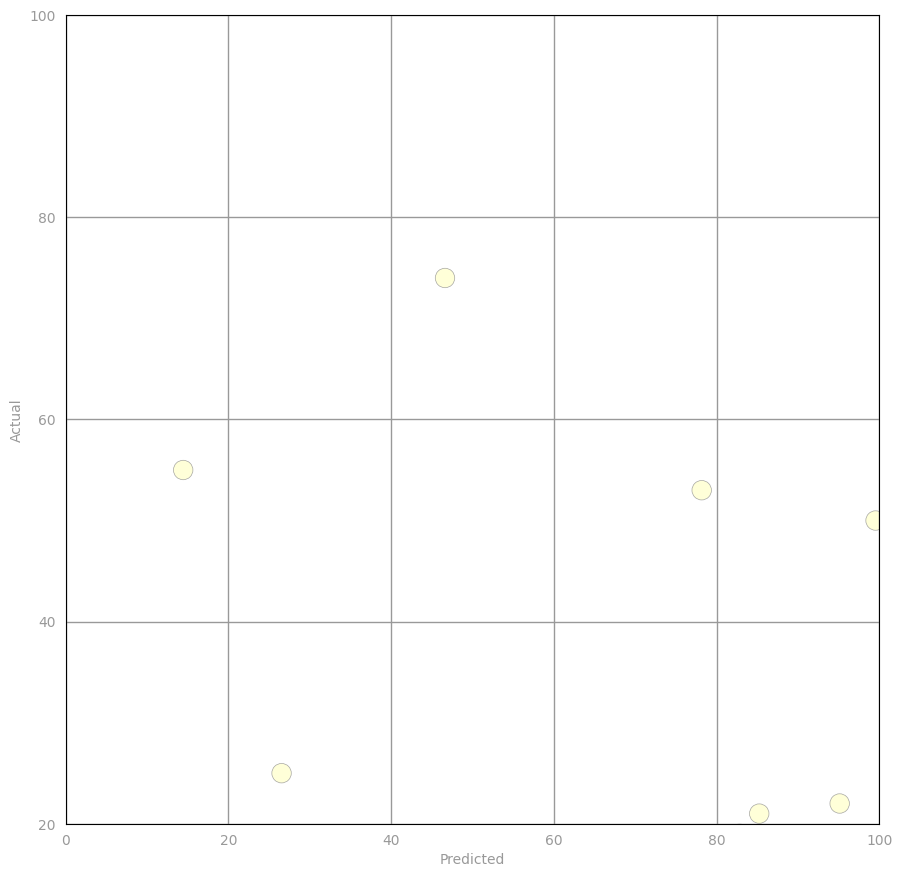

In [137]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap

cmap = get_cmap('YlOrRd')

def preparePlot(xticks, yticks, figsize=(10.5, 10.5), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

predictions = np.asarray(parsedValData
                         .map(lambda lp: firstModel.predict(lp.features))
                         .collect())

actual = np.asarray(parsedValData
                    .map(lambda lp: lp.label).collect())

error = np.asarray(parsedValData
                   .map(lambda lp: (lp.label, firstModel.predict(lp.features))).map(lambda lp: squaredError(lp[0], lp[1]))
                   .collect())

norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 120, 20), np.arange(0, 120, 20))
ax.set_xlim(0, 100), ax.set_ylim(20, 100)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=.5)
ax.set_xlabel('Predicted'), ax.set_ylabel(r'Actual')
pass

<ipython-input-148-23136646b3ec>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')


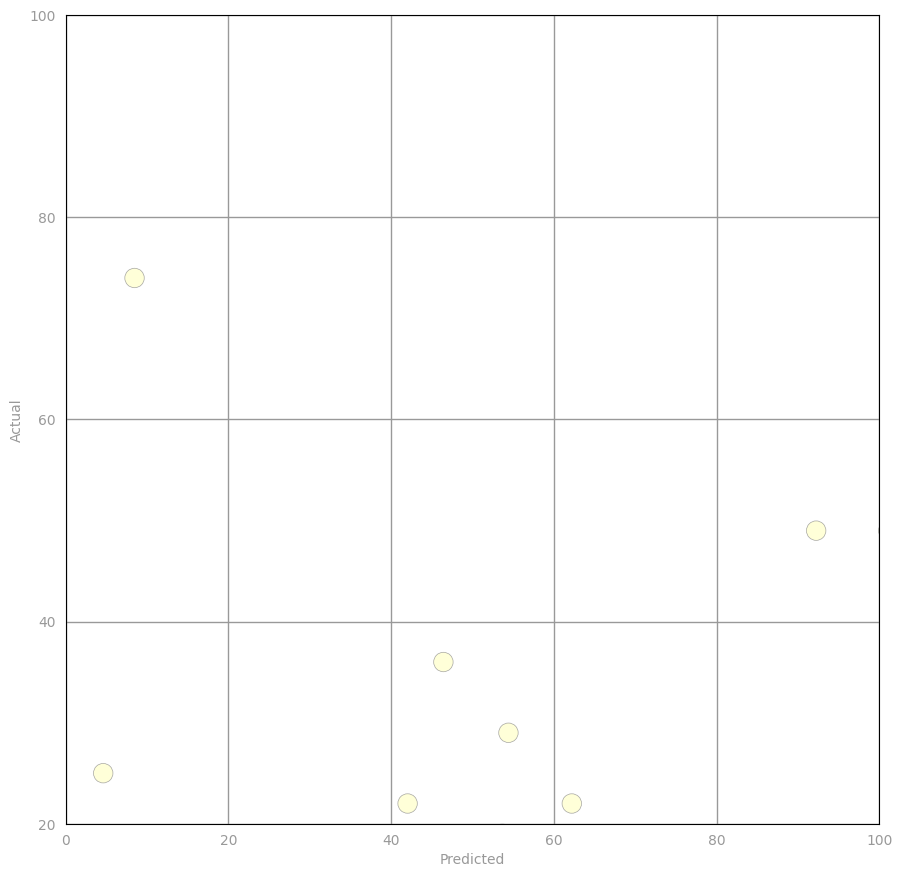

In [148]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.cm import get_cmap

cmap = get_cmap('YlOrRd')

def preparePlot(xticks, yticks, figsize=(10.5, 10.5), hideLabels=False, gridColor='#999999',
                gridWidth=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

predictions = np.asarray(parsedValDataOrderTwo
                         .map(lambda lp: secondModel.predict(lp.features))
                         .collect())

actual = np.asarray(parsedValDataOrderTwo
                    .map(lambda lp: lp.label).collect())

error = np.asarray(parsedValDataOrderTwo
                   .map(lambda lp: (lp.label, secondModel.predict(lp.features))).map(lambda lp: squaredError(lp[0], lp[1]))
                   .collect())

norm = Normalize()
clrs = cmap(np.asarray(norm(error)))[:,0:3]

fig, ax = preparePlot(np.arange(0, 120, 20), np.arange(0, 120, 20))
ax.set_xlim(0, 100), ax.set_ylim(20, 100)
plt.scatter(predictions, actual, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=.5)
ax.set_xlabel('Predicted'), ax.set_ylabel(r'Actual')
pass

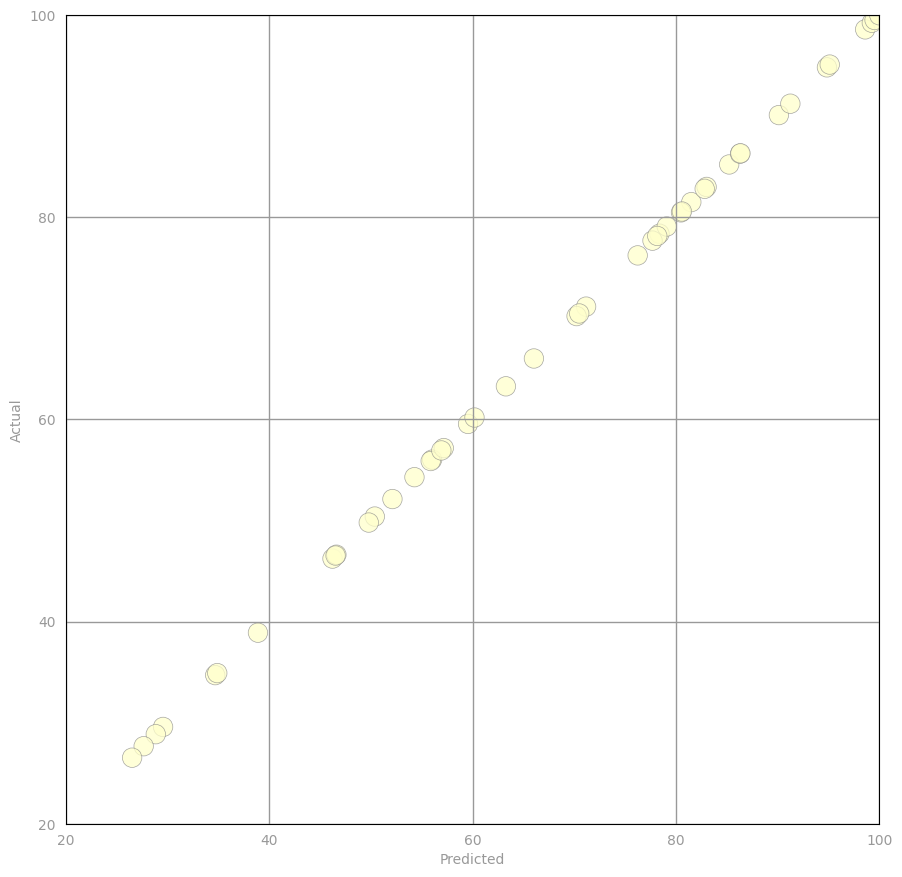

In [138]:
fig, ax = preparePlot(np.arange(0, 120, 20), np.arange(0, 120, 20))
ax.set_xlim(20, 100), ax.set_ylim(20, 100)
plt.scatter(predictions, predictions, s=14**2, c=clrs, edgecolors='#888888', alpha=0.75, linewidths=.5)
ax.set_xlabel('Predicted'), ax.set_ylabel(r'Actual')
pass